In [59]:
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
import h5py
import sys
from os import walk
from skimage.feature import blob_log
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path

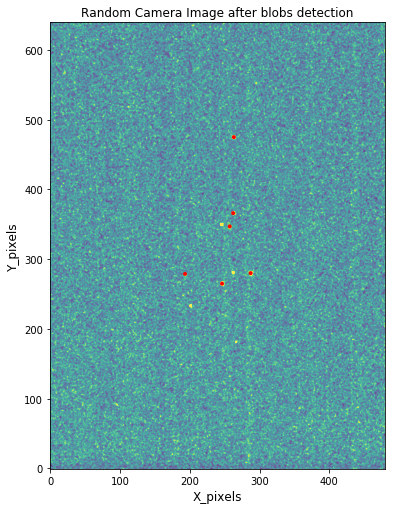

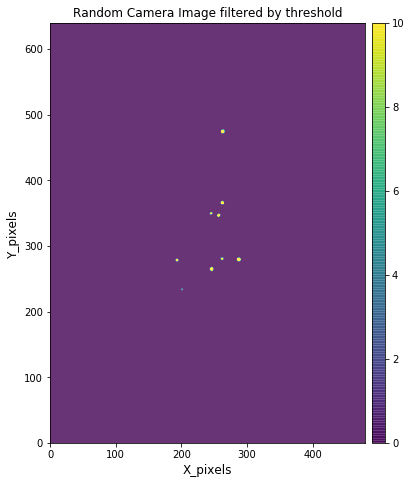

In [61]:
data_path = '/Users/hsin-yiwang/Desktop/Insitucell_for_XPS/FlashBeamtime/DATA/XPS099/'
data_names = discover_datas(data_path)
h5file = h5py.File(data_path+data_names[0], 'r')
Image = h5file['/FL1/Experiment/Camera/PG/Basler FW 1/image/'].value
N_shots = Image.shape[0]

m = random.randint(0,N_shots-1)
#Figure 1
blobs = blob_log(Image[m,:,:], min_sigma=1, max_sigma=20, num_sigma=10, threshold=0.1, overlap=0.5, log_scale=False)
blobs[:, 2] = blobs[:, 2] * sqrt(2)
y = blobs[:,0]
x = blobs[:,1]
r = blobs[:,2]
fig, ax = plt.subplots(figsize=[6,10])
for i in np.arange(blobs.shape[0]):
    circle = plt.Circle((x[i], y[i]), r[i], color='r', linewidth=2, fill=False)
    ax.add_artist(circle)
plt.imshow(Image[m,:,:],vmin=0,vmax = 10, origin='lower', interpolation='bicubic',alpha = 0.8)    
plt.title('Random Camera Image after blobs detection',size=12)
plt.xlabel('X_pixels',size=12)
plt.ylabel('Y_pixels',size=12)
plt.savefig('/Users/Hsin-YiWang/Desktop/test1.png', dpi=300)
#Figure 2
plt.figure(figsize=[6,10])
ax = plt.subplot(1,1,1)
thr = 30
Image[m,:,:][Image[m,:,:]<thr]=0
plt.imshow(Image[m,:,:],vmin=0,vmax = 10, origin='lower', interpolation='bicubic',alpha = 0.8)
plt.title('Random Camera Image filtered by threshold',size=12)
plt.xlabel('X_pixels',size=12)
plt.ylabel('Y_pixels',size=12)
plt.xlim(0,480)
plt.ylim(0,640)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
plt.colorbar(cax=cax)
plt.savefig('/Users/Hsin-YiWang/Desktop/test2.png', dpi=300)
plt.show()
